In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

sns.set()

import glob

import soundfile as sf
from scipy.io import wavfile
from scipy import signal

from bokeh.io import curdoc
from bokeh.layouts import layout, column, row, widgetbox
from bokeh.models import Slider, ColumnDataSource
from bokeh.plotting import figure, output_file, show, reset_output
from bokeh.models.widgets import Select

reset_output()

output_file('dashboard2.html')

# move to utilities
def convert_wav(filename):
    data, samplerate = sf.read(filename)
    converted_filename = filename.split('.')[0] + '-32bit.wav'
    sf.write(converted_filename, data, samplerate, subtype='PCM_32')

files = glob.glob('audio_files/*.wav')

def data_list(val, lst):
    return [x for x in lst if x != val]
    
rate, data = wavfile.read(files[1])

plots = []
for i in range(4):
    f, t, Sxx = signal.spectrogram(data[:,i],rate)
    Sxx = np.log(Sxx)

    plots.append(Sxx)
    
    ax = sns.heatmap(Sxx,xticklabels=False, yticklabels=False, cbar=False)
    ax.invert_yaxis()
    plt.savefig('tmp/spectrogram_mic{}.png'.format(i))

summed_Sxx = reduce(lambda x,y: x+y, plots)/4.
ax = sns.heatmap(summed_Sxx,xticklabels=False, yticklabels=False, cbar=False)
ax.invert_yaxis()
plt.savefig('tmp/spectrogram_mic_total.png')

file_select = Select(title='File:', value=files[0], opens=files)

show(widgetbox(file_select))

AttributeError: unexpected attribute 'opens' to Select, similar attributes are options

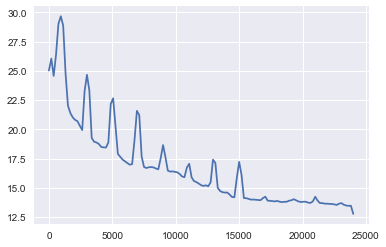

(129,)


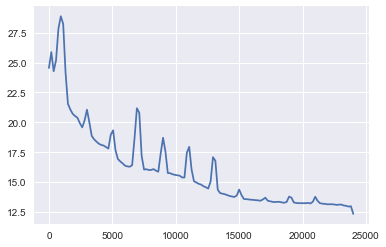

(129,)


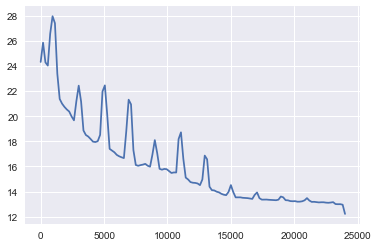

(129,)


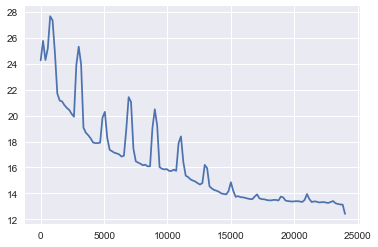

(129,)


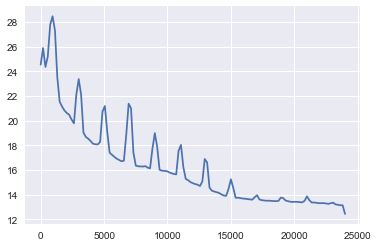

In [5]:
total = 0
for i in range(4):
    f, Pxx_den = signal.welch(data[:,i],rate)
    Sxx = np.log(Pxx_den)

    plt.plot(f,Sxx)
    plt.show()
    total += Sxx
    print Sxx.shape

plt.plot(f, total/4.)
plt.show()

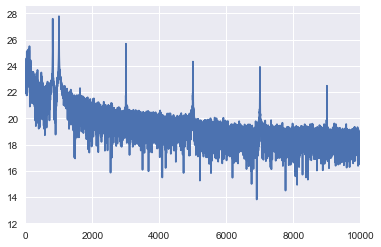

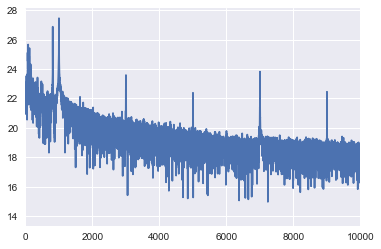

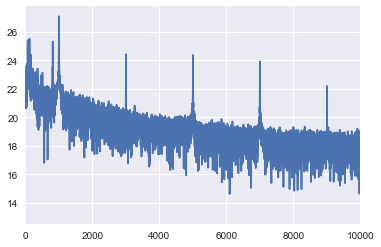

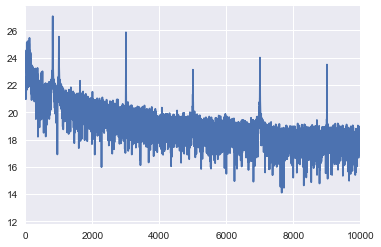

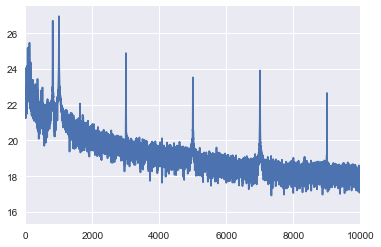

In [6]:
total = 0
for i in range(4):
    fft = np.log(np.fft.fft(data[:,i],rate))
    plt.plot(fft)
    plt.xlim(0,10000)
    plt.show()
    total += fft

plt.plot(total/4.)
plt.xlim(0,10000)
plt.show()